# Pymaceuticals Inc.
---

### Analysis

- 51% of the mice in the experiment that had tumors were male while the other 49% were female. 
- The bar graph shows that the Capomulin treatment performs the best in terms of reducing the size of tumors with the number of its timepoints being over 200 (somewhere around 240). In addition, Ramicane is the second best treatment after Capomulin with it having somewhere around 235 timepoints. On the other hand, the graph also shows that the least effective treatment is the Propriva with it's timepoints being around 140. 
- On the line graph, it shows that after 20 days, there was a sudden drop in the tumor volume (from 48 mm3 to 44 mm3) with the Capomulin treatment.
- Through the analysis, there is a positive correlation between the weight of the mice and the average tumor volume with the value correlation being 0.84 and the points and line on the graph trending upwards. 
- From the data, tables, and graphs presented, Capomulin and Ramicane are the most effective treatments for reducing the size of tumors. 

In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [149]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [150]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice_ID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupli_mice_ID

array(['g989'], dtype=object)

In [151]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dupli_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [152]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(dupli_mice_ID)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [153]:
# Checking the number of mice in the clean DataFrame.
clean_data_num = clean_data["Mouse ID"].nunique()
clean_data_num

248

## Summary Statistics

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



mean = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median,
                                     "Tumor Volume Variance":var, "Tumor Volume Std. Dev.":std,
                                     "Tumor Volume Std. Err.":sem})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [155]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation = clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

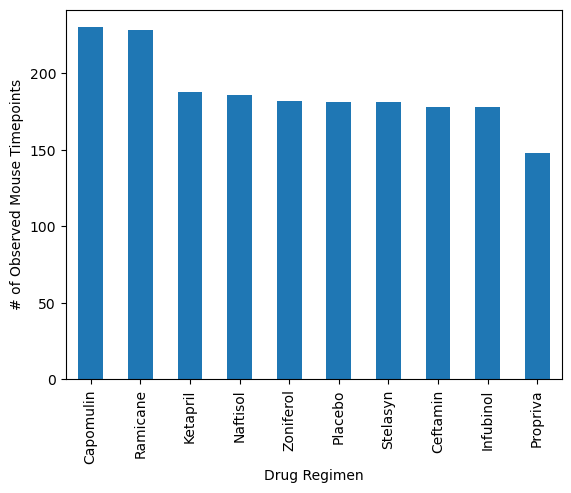

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
graph_bar = clean_data.groupby(["Drug Regimen"])['Timepoint'].count()


plot_bar = graph_bar.sort_values(ascending=False).plot.bar(color='tab:blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout
plt.show()

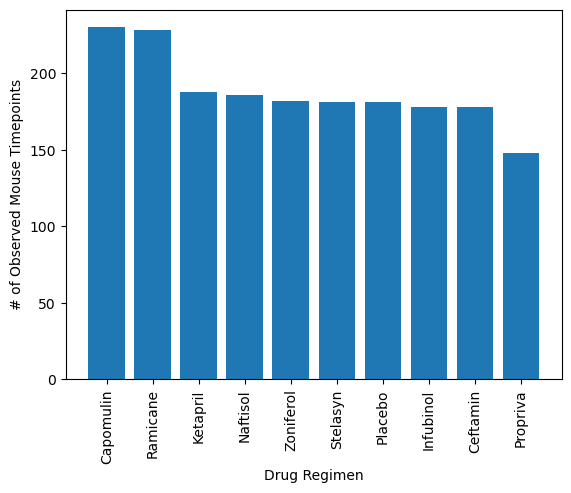

In [136]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
graph_bar = clean_data['Drug Regimen'].value_counts()
x_axis = graph_bar.index
y_axis = graph_bar.values

plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.tight_layout
plt.show()

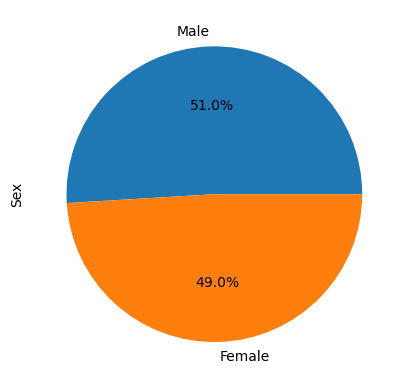

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data['Sex'].value_counts()

gender_data.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

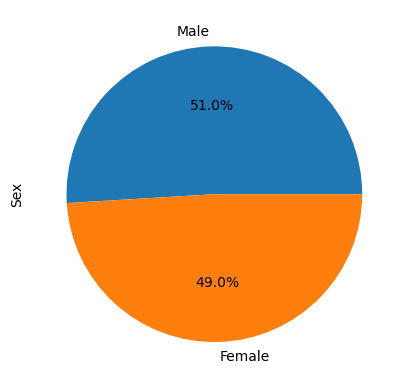

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_data, labels=('Male', 'Female'), autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_volume = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
group_volume = group_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = group_volume.merge(clean_data, on=['Mouse ID', 'Timepoint'], how="left")

In [140]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = merged_data.loc[merged_data["Drug Regimen"] == d, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr) 
    
    outlier = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    print(f"{d}'s potential outliers: {outlier}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


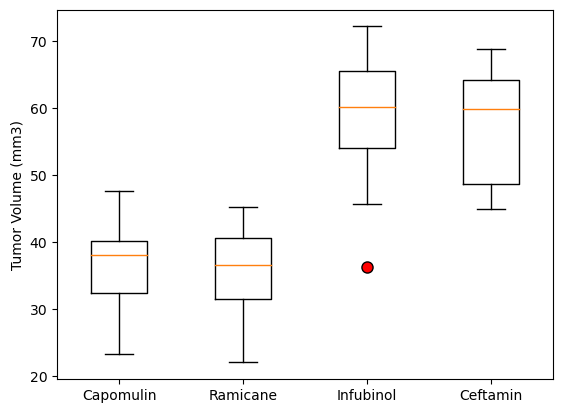

In [141]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Tumor Volume (mm3)")
red_dot = dict(markerfacecolor = "red", markersize=8)

ax1.boxplot(tumor_vol_list, flierprops=red_dot)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

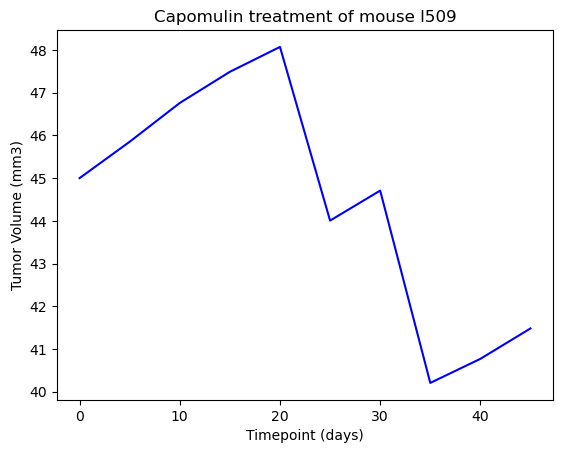

In [142]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
graph_line = capomulin.loc[capomulin["Mouse ID"] == "l509", :]
x_axis = graph_line["Timepoint"]
y_axis = graph_line["Tumor Volume (mm3)"]


plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, color='blue')
plt.show()


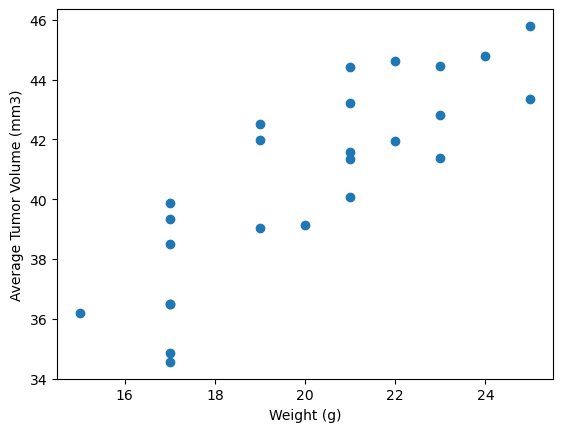

In [143]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
avg_tumor_scatter = capomulin.groupby(['Mouse ID']).mean(numeric_only=True)
x_axis = avg_tumor_scatter["Weight (g)"]
y_axis = avg_tumor_scatter["Tumor Volume (mm3)"]


plt.xlabel("Weight (g)") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis, y_axis,facecolors="tab:blue")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


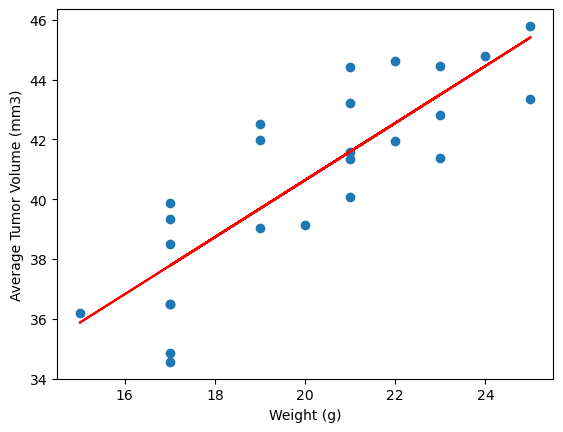

In [147]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = avg_tumor_scatter["Weight (g)"]
tumor = avg_tumor_scatter["Tumor Volume (mm3)"]
correlation_c = st.pearsonr(weight, tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_c[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(weight, tumor,facecolors="tab:blue")
plt.plot(weight, regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
